<a href="https://colab.research.google.com/github/yannluethi/BINA/blob/main/Case-Study/Python/BINA_Case-Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To Dos:



*   Map - Fabio
*   Verspätungen berechnen - Allan
* Daten hochladen - Allan
* Github erstellen - Yann
* Ideen sammeln zu Plots/Darstellungen - Alle



#<font color='blue'>Verspätungen am Bahnhof Flughafen Zürich</font>

### BINA - Business Intelligence & Analytics (FS24)
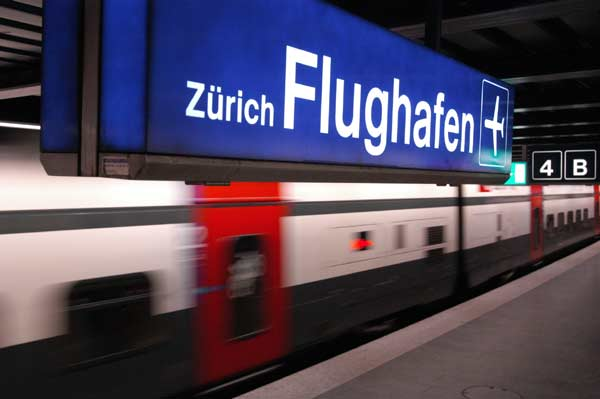

###Studierende
&nbsp;Yann Lüthi

&nbsp;Allan McGee

&nbsp;Fabio Spaar

###Dozent
&nbsp;Daniel Benninger

# Step 1: Defining objectives and information needs

## Einleitung und Ausgangslage
Die Schweizerische Bundesbahnen (SBB) gelten weltweit als eines der zuverlässigsten Bahnunternehmen. Dennoch sind Verspätungen im öffentlichen Verkehr unvermeidlich, und auch die SBB sind davon nicht ausgenommen. In diesem Kontext ist es interessant, einen genaueren Blick auf die Gründe für Verspätungen bei der SBB zu werfen und zu erfahren, wie die Bundesbahnen mit diesen Herausforderungen umgeht. Trotz ihrer hohen Pünktlichkeitsrate ist die SBB stets bestrebt, ihre Servicequalität zu verbessern.

Im Kontext des Moduls Binar plant die SBB eine gründliche Analyse der Zugfahrzeiten aufgrund negativer Kunden-, bzw. Passagierrückmeldungen, um Massnahmen zur Verbesserung der Pünktlichkeit und Zuverlässigkeit abzuleiten. Speziell für den Bahnhof Flughafen Zürich sollen Analysen durchgeführt werden, um etwaige Herausforderungen zu identifizieren und die Effizienz des Fahrplans zu steigern. Die gewonnenen Erkenntnisse werden als Grundlage für mögliche Anpassungen im Fahrplan, Infrastrukturverbesserungen und Schulungen dienen, um die Zufriedenheit zu erhöhen und die Gesamterfahrung der Fahrgäste zu optimieren.

Die Abfahrts- und Ankunftszeiten im Zugverkehr können durch verschiedene Faktoren beeinflusst werden, darunter Wochentage, Ferien und Jahreszeiten. Wochentage können unterschiedliche Verkehrsaufkommen hervorrufen, während Ferien und Jahreszeiten zu veränderten Reisemustern und infrastrukturellen Herausforderungen führen können. Die Analyse dieser Faktoren ist entscheidend, um Schwachstellen im Fahrplan zu identifizieren und Strategien zur Anpassung an dynamische Anforderungen zu entwickeln.

## Abgrenzung
Die Projektgruppe legt dabei den Fokus auf den Bahnhof Flughafen Zürich. Dieser Bahnhof eigent sich gut für die Analyse, da er ein hohes Passagieraufkommen aufweist und gewisse Abhängigkeiten zum Flugverkehr aufweist.

# Step 2: Collecting Data

## Datengrundlage
Für die Analyse der Fahrdaten des Bahnhofs Flughafen Zürich dient die Open-Data-Plattform Mobilität Schweiz als umfassende Datengrundlage. Diese Plattform, zugänglich unter https://opentransportdata.swiss/de/ist-daten-archiv/, stellt eine vielfältige Sammlung von Daten im Bereich der öffentlichen Mobilität in der Schweiz zur Verfügung. Um gezielt die Daten für den Bahnhof Flughafen Zürich zu extrahieren, wurde eine spezifische Auswahl vorgenommen, um ausschliesslich relevante Informationen zu erhalten.

Die Datenbeschaffung erfolgte im Zeitraum des letzten Jahres (2023). Durch diese zeitliche Begrenzung wird sichergestellt, dass die Analyse auf aktuellen und relevanten Informationen basiert. Die ausgewählten Datensätze umfassen Informationen über Ankunfts- und Abfahrtszeiten, Zugverbindungen, eventuelle Verspätungen sowie weitere relevante Details, die für eine detaillierte Analyse der Pünktlichkeit am Flughafen Zürich von Bedeutung sind.

Die Verwendung der Open-Data-Plattform Mobilität Schweiz ermöglicht nicht nur eine präzise und umfangreiche Datengrundlage, sondern fördert auch die Transparenz und den freien Zugang zu öffentlichen Verkehrsdaten. Dies bildet die Grundlage für eine fundierte Analyse, um mögliche Muster, Ursachen und Trends in Bezug auf Verspätungen am Bahnhof Flughafen Zürich zu identifizieren.

## GitHub-Integration zur Versionierung
GitHub bietet eine bewährte Plattform für die Versionskontrolle die es ermöglicht Änderungen nachzuverfolgen und gemeinsam an Projekten zu arbeiten. Um für unsere Case Study die Zusammenarbeit in Google Colab zu vereinfachen wird die GitHub-Integration in Google Colab verwendet. Änderungen am Jupyter Notebook sowie an den Daten sind somit jederzeit nachvollziehbar.

In [ ]:
# Copy GIT repository to Google Colab environment
!git clone https://github.com/yannluethi/BINA.git

Cloning into 'BINA'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 126 (delta 10), reused 5 (delta 5), pack-reused 100
Receiving objects: 100% (126/126), 18.27 MiB | 9.33 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [ ]:
# Change to Data directory
%cd BINA/Case-Study/Data

# Step 3 & 4: Analyzing Data & Presenting Information

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#read file to see file structure of .excel filesof matching table ZRH_Flughafen_2023.xlsx
sbb = pd.read_excel("ZRH_Flughafen_2023.xlsx")
sbb

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,...,FAELLT_AUS_TF,BPUIC,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
0,09.06.2023,85:11:1507:002,85:11,SBB,Schweizerische Bundesbahnen SBB,NaN,1507,IC5,NaN,IC,...,False,8503016,Zürich Flughafen,09.06.2023 06:42,09.06.2023 06:42:13,REAL,09.06.2023 06:43,09.06.2023 06:44:35,REAL,False
1,09.06.2023,85:11:1510:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1510,IC5,NaN,IC,...,False,8503016,Zürich Flughafen,09.06.2023 07:16,09.06.2023 07:15:36,REAL,09.06.2023 07:18,09.06.2023 07:18:12,REAL,False
2,09.06.2023,85:11:1511:003,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1511,IC5,NaN,IC,...,True,8503016,Zürich Flughafen,09.06.2023 08:42,NaN,UNBEKANNT,09.06.2023 08:43,NaN,UNBEKANNT,False
3,09.06.2023,85:11:1527:003,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1527,IC5,NaN,IC,...,False,8503016,Zürich Flughafen,09.06.2023 16:42,09.06.2023 16:42:20,REAL,09.06.2023 16:43,09.06.2023 16:44:13,REAL,False
4,09.06.2023,85:11:1530:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1530,IC5,NaN,IC,...,False,8503016,Zürich Flughafen,09.06.2023 17:16,09.06.2023 17:16:57,REAL,09.06.2023 17:18,09.06.2023 17:20:02,REAL,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167515,10.05.2023,85:11:90432:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,90432,S24,NaN,S,...,True,8503016,Zürich Flughafen,10.05.2023 09:26,NaN,UNBEKANNT,10.05.2023 09:27,NaN,UNBEKANNT,False
167516,10.05.2023,85:11:96:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,96,EC,NaN,EC,...,False,8503016,Zürich Flughafen,10.05.2023 22:16,10.05.2023 22:27:29,REAL,10.05.2023 22:18,10.05.2023 22:28:00,REAL,False
167517,10.05.2023,85:11:97:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,97,EC,NaN,EC,...,False,8503016,Zürich Flughafen,10.05.2023 07:41,10.05.2023 07:42:15,REAL,10.05.2023 07:43,10.05.2023 07:43:27,REAL,False
167518,10.05.2023,85:11:98:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,98,EC,NaN,EC,...,False,8503016,Zürich Flughafen,10.05.2023 20:16,10.05.2023 20:15:55,REAL,10.05.2023 20:18,10.05.2023 20:17:57,REAL,False


Erklärtext zum Skript ExtractionFromCSV.py

Benötigte Python Packages:

pandas
os
openpyxl

Quelle für dtype Spezifikation:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [ ]:
import pandas as pd
import os

# Pfad zum Ordner mit den CSV-Dateien
ordner_pfad = '/Ordnerpfad/Input Folder'

# Definition der Datentypen, damit pd.read_csv diese richtig erkennt und einlesen kann
datentypen = {
    'BETRIEBSTAG': str,
    'FAHRT_BEZEICHNER': str,
    'BETREIBER_ID': str,
    'BETREIBER_ABK': str,
    'BETREIBER_NAME': str,
    'PRODUKT_ID': str,
    'LINIEN_ID': str,
    'LINIEN_TEXT': str,
    'UMLAUF_ID': str,
    'VERKEHRSMITTEL_TEXT': str,
    'ZUSATZFAHRT_TF': bool,
    'FAELLT_AUS_TF': bool,
    'BPUIC': str,
    'HALTESTELLEN_NAME': str,
    'ANKUNFTSZEIT': str,
    'AN_PROGNOSE': str,
    'AN_PROGNOSE_STATUS': str,
    'ABFAHRTSZEIT': str,
    'AB_PROGNOSE': str,
    'AB_PROGNOSE_STATUS': str,
    'DURCHFAHRT_TF': str
}

# Initialisierung eines leeren Dictionary, um die DataFrames zu speichern
dataframes = {}


# Durchlaufen aller Dateien im angegebenen Ordner
for dateiname in os.listdir(ordner_pfad):
    if dateiname.endswith('.csv'):  # Überprüfen, ob die Datei eine CSV-Datei ist
        voller_dateipfad = os.path.join(ordner_pfad, dateiname)

        # Einlesen der CSV-Datei in ein DataFrame
        df = pd.read_csv(voller_dateipfad, sep=';' , dtype=datentypen) #Trennzeichen und Datentypen definieren

        # Ersetzen Sie NA-Werte in der 'DURCHFAHRT_TF'-Spalte durch False
        # Dies wird gemacht, weil NA-Werte zu Problemen geführt hatten. Im ganzen Datensatz ist dieser immer FALSE
        df['DURCHFAHRT_TF'] = df['DURCHFAHRT_TF'].fillna(False)

        # Entfernen der Dateiendung (.csv) vom Dateinamen, um diesen als Identifikator im Dictionary zu verwenden
        schlüssel = dateiname[:-4]

        # Hinzufügen des DataFrame zum Dictionary
        dataframes[schlüssel] = df

# Erstellen eines neuen Dictionary, um die gefilterten DataFrames zu speichern
gefilterte_dataframes = {}

for schlüssel, df in dataframes.items():
    # Filtern nach Linien der SBB, welche am Zürich Flughafen halten
    gefiltert = df[(df['BETREIBER_ABK'] == 'SBB') & (df['HALTESTELLEN_NAME'] == 'Zürich Flughafen')]

    # Speichern des gefilterten DataFrames im neuen Dictionary
    gefilterte_dataframes[schlüssel] = gefiltert

    # Anzeigen der Anzahl der Datensätze im gefilterten DataFrame
    anzahl_datensaetze = len(gefiltert)
    print(f"Anzahl der Datensätze im gefilterten DataFrame für {schlüssel}: {anzahl_datensaetze}\n")
    print("\n")

# Zusammenführen aller gefilterten DataFrames in einen einzigen DataFrame
gesamter_dataframe = pd.concat(gefilterte_dataframes.values(), ignore_index=True)

# Pfad, wo die Excel-Datei gespeichert werden soll
excel_dateipfad = '/Ordnerpfad/Output Folder/ZRH_Flughafen_2023.xlsx'

# Exportieren des gesamten DataFrames als Excel-Datei
gesamter_dataframe.to_excel(excel_dateipfad, index=False)

# Feedback
print(f"Der gesamte DataFrame wurde erfolgreich als Excel-Datei gespeichert: {excel_dateipfad}")


FileNotFoundError: [Errno 2] No such file or directory: '/Ordnerpfad/Input Folder'

CURL Ansatz kurz beschreiben.

In [ ]:
import folium

# Zentriere die Karte auf Bahnhof Zürich Flughafen
map_center = [47.4477, 8.5686]

# Erstelle eine leere Karte
map_stops = folium.Map(location=map_center, zoom_start=12)

# Setze Marker für Bahnhof Flughafen Zürich
folium.Marker(
    location=[47.4477, 8.5686],
    icon=folium.Icon(color='red', icon='map-marker')
).add_to(map_stops)

# Iteriere durch die Zeilen der Daten und füge Marker für die Start-Haltestelle (grün) und Ziel-Haltestelle (rot) hinzu
#for index, row in df.iterrows():
#    if row['Destination'] == 'Start':
#        icon_color = 'green'
#    elif row['Destination'] == 'Ziel':
#        icon_color = 'blue'
#    else:
#        icon_color = 'red'  # oder eine andere Farbe für andere Haltestellen
#
#    folium.Marker(
#        location=[row['Latitude'], row['Longitude']],
#        tooltip=row['Haltestellenname'],
#        icon=folium.Icon(icon='map-marker', prefix='fa', color=icon_color)
#    ).add_to(map_stops)

# Zeige die Karte an
map_stops


In [ ]:
import folium
import pandas as pd

# Zentriere die Karte auf Bahnhof Zürich Flughafen
map_center = [47.4477, 8.5686]

# Erstelle eine leere Karte
map_stops = folium.Map(location=map_center, zoom_start=12)

# Setze Marker für Bahnhof Flughafen Zürich
folium.Marker(
    location=[47.4477, 8.5686],
    icon=folium.Icon(color='red', icon='map-marker')
).add_to(map_stops)

# Lese die Daten aus Excel
excel_file_path = '/content/Entwurf SBB Aufkommen Fernverkehr.xlsx'
data = pd.read_excel(excel_file_path)

# Überprüfe die Spaltennamen
print(data.columns)

# Iteriere durch die Daten und füge Marker hinzu
for index, row in data.iterrows():
    latitude = row['BreitengradZiel']  # Überprüfe und passe ggf. die Spaltennamen an
    longitude = row['LaengengradZiel']  # Überprüfe und passe ggf. die Spaltennamen an

    # Setze Marker für jeden Punkt
    folium.Marker(
        location=[latitude, longitude],
        icon=folium.Icon(color='blue', icon='map-marker')
    ).add_to(map_stops)

# Zeige die Karte an
map_stops

Index(['Linie', 'Von', 'Nach', 'Ziel', 'Fahrtrichtung', 'BreitengradZiel',
       'LaengengradZiel', 'Fahrten pro Jahr'],
      dtype='object')


In [ ]:
import pandas as pd

# Gib die URL der Webseite mit der Tabelle an
url = 'https://www.ferienwiki.ch/ferienkalender/2023/ch'

# Lese die Tabelle von der Webseite
tables = pd.read_html(url)

# Angenommen, die Tabelle, die du möchtest, ist die erste auf der Seite
schulferien_tabelle = tables[1]

# Zeige die extrahierte Tabelle an
schulferien_tabelle

,Kanton,Frühlingsferien,Sportferien,Sommerferien,Herbstferien,Weihnachtsferien
0,Zürich,24.04 - 06.05,NaN,17.07 - 19.08,09.10 - 21.10,25.12 - 06.01
1,Bern,07.04 - 23.04,NaN,08.07 - 13.08,23.09 - 15.10,23.12 - 07.01
2,Luzern,07.04 - 23.04,11.02 - 26.02,08.07 - 20.08,30.09 - 15.10,23.12 - 07.01
3,Uri,22.04 - 07.05,04.03 - 12.03,01.07 - 20.08,07.10 - 22.10,23.12 - 07.01
4,Schwyz,01.05 - 12.05,27.02 - 03.03,10.07 - 18.08,02.10 - 13.10,24.12 - 05.01
5,Obwalden,07.04 - 23.04,16.02 - 26.02,01.07 - 13.08,07.10 - 29.10,24.12 - 08.01
6,Nidwalden,"07.04 - 23.04, 19.05",11.02 - 26.02,08.07 - 27.08,30.09 - 15.10,23.12 - 07.01
7,Glarus,"07.04 - 23.04, 08.05, 19.05",28.01 - 05.02,01.07 - 13.08,07.10 - 22.10,23.12 - 07.01
8,Zug,"15.04 - 30.04, 18.05 - 21.05",04.02 - 19.02,08.07 - 20.08,07.10 - 22.10,23.12 - 07.01
9,Freiburg,"07.04 - 21.04, 19.05",20.02 - 24.02,10.07 - 23.08,16.10 - 27.10,25.12 - 05.01


No charts were generated by quickchart


#Fazit und Ausblick

Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet. Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet.